In [47]:
from kmeans import *
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
from util import *
import pandas as pd
import math

In [63]:
kmeans = {}
for i in range(1, 6):
    kmeans[i] = Kmeans('Datasets/output.csv', i)
    kmeans[i].read_csv(['INFECTION_RATE', 'ICU_RATE', 'TEST_POS_PERCENTAGE'])
    kmeans[i].start_clustering()

Start clustering
Choosing initial representatives
Initial representatives are:
[[ 0.6489 13.4287  7.2704]]
Calculating distances
Recalculating representatives
Representatives recalculated:
[[ 1.05298182 13.32640909  7.7212    ]]
Calculating distances
Recalculating representatives
Representatives recalculated:
[[ 1.05298182 13.32640909  7.7212    ]]
Clustering ended
Start clustering
Choosing initial representatives
Initial representatives are:
[[ 0.8416 16.2631  5.8787]
 [ 0.6489 13.4287  7.2704]]
Calculating distances
Recalculating representatives
Representatives recalculated:
[[ 1.06238    16.7871      7.508     ]
 [ 1.04515    10.4425      7.89886667]]
Calculating distances
Recalculating representatives
Representatives recalculated:
[[ 1.02695    16.24693333  7.33663333]
 [ 1.08422     9.82178     8.18268   ]]
Calculating distances
Recalculating representatives
Representatives recalculated:
[[ 0.97294286 15.84432857  7.32717143]
 [ 1.19305     8.92005     8.41075   ]]
Calculating dis

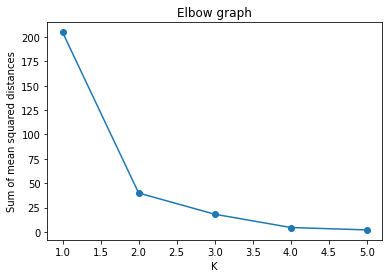

In [65]:
x = []
y = []
for key in kmeans:
    x.append(kmeans[key].k)
    y.append(kmeans[key].accuracy)

plt.plot(x, y)
plt.scatter(x, y)
plt.xlabel("K")
plt.ylabel("Sum of mean squared distances")
plt.title("Elbow graph")
plt.show()

In [66]:
kmeans[4].accuracy

4.4934247582500015

In [67]:
kmeans[4].get_clusters_info()

{0: {'mean': array([ 0.88306, 15.08232,  6.61018]),
  'stdev': array([0.15655419, 1.31622464, 0.48627805]),
  'max': array([ 1.1302, 16.3656,  7.2704]),
  'min': array([ 0.6489, 13.4287,  5.8787])},
 1: {'mean': array([ 1.46575, 11.7998 ,  9.9159 ]),
  'stdev': array([0.21765, 0.1309 , 1.2232 ]),
  'max': array([ 1.6834, 11.9307, 11.1391]),
  'min': array([ 1.2481, 11.6689,  8.6927])},
 2: {'mean': array([ 1.19765, 17.74935,  9.11965]),
  'stdev': array([0.02795, 0.89645, 0.58065]),
  'max': array([ 1.2256, 18.6458,  9.7003]),
  'min': array([ 1.1697, 16.8529,  8.539 ])},
 3: {'mean': array([0.92035, 6.0403 , 6.9056 ]),
  'stdev': array([0.14365, 0.3486 , 1.0765 ]),
  'max': array([1.064 , 6.3889, 7.9821]),
  'min': array([0.7767, 5.6917, 5.8291])}}

In [68]:
kmeans[4].get_dataset_info()

{'mean': array([ 1.05298182, 13.32640909,  7.7212    ]),
 'stdev': array([0.27341021, 3.99913133, 1.60152644]),
 'max': array([ 1.6834, 18.6458, 11.1391]),
 'min': array([0.6489, 5.6917, 5.8291])}

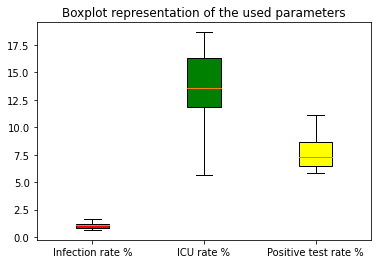

In [69]:
draw_boxplot(kmeans[1].original_dataset)

In [57]:
def look_for_province(list):
    data = pd.read_csv('Datasets\output.csv')
    for entry in data.itertuples():
        if entry[2] == list[0]:
            return entry[1]
    return 

In [70]:
with open("Results/index.html", "w") as file:
    file.write("")

for key in kmeans:
    data = []
    for i in range(len(kmeans[key].c)):   
        row = []
        row.append(look_for_province(kmeans[key].original_dataset[i]))
        row.append(round(kmeans[key].c[i]))
        row.append(kmeans[key].original_dataset[i][0])
        row.append(kmeans[key].original_dataset[i][1])
        row.append(kmeans[key].original_dataset[i][2])
        data.append(row)

    table = pd.DataFrame(data, columns = ["Province", "Cluster", "Infection rate %", "ICU rate %", "Positive test rate %"])
    table = table.sort_values(by=['Cluster'])
    html = generate_html_table(table)
    
    with open("Results/index.html", "a") as file:
        file.write(f'<h2>K = {key}</h2>')
        file.write(html)